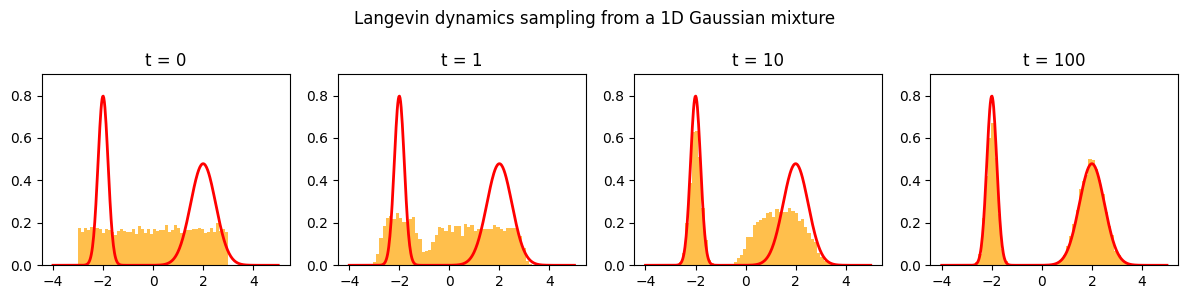

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Mixture parameters
pi1, mu1, sigma1 = 0.6, 2.0, 0.5
pi2, mu2, sigma2 = 0.4, -2.0, 0.2

# PDF and gradient functions
def gaussian_pdf(x, mu, sigma):
    return (1.0 / (np.sqrt(2.0 * np.pi) * sigma) * np.exp(-0.5 * ((x - mu)/sigma)**2))

def mixture_pdf(x):
    return pi1 * gaussian_pdf(x, mu1, sigma1) + pi2 * gaussian_pdf(x, mu2, sigma2)

def grad_log_mixture_pdf(x):
    n1 = gaussian_pdf(x, mu1, sigma1)
    n2 = gaussian_pdf(x, mu2, sigma2)
    numerator = (pi1 * n1 * (-(x - mu1) / sigma1**2) + pi2 * n2 * (-(x - mu2) / sigma2**2))
    denominator = pi1 * n1 + pi2 * n2 + 1e-16
    return numerator / denominator

# Langevin dynamics parameters
M = 10_000
np.random.seed(1234)
x_min, x_max = -3.0, 3.0
x = np.random.uniform(x_min, x_max, size=M)
eta = 0.01
n_steps = 100
plot_times = [0, 1, 10, 100]
sample_snapshots = {0: x.copy()}

# Perform Langevin dynamics
for t in range(1, n_steps+1):
    grad = grad_log_mixture_pdf(x)
    x = x + eta*grad + np.sqrt(2*eta)*np.random.randn(M)
    if t in plot_times:
        sample_snapshots[t] = x.copy()

# Plot results
plt.figure(figsize=(12, 3))
for i, t in enumerate(plot_times):
    plt.subplot(1, len(plot_times), i+1)
    plt.hist(sample_snapshots[t], bins=50, density=True, alpha=0.7, color='orange')
    grid = np.linspace(-4, 5, 400)
    pdf_vals = mixture_pdf(grid)
    plt.plot(grid, pdf_vals, 'r-', lw=2)
    plt.title(f"t = {t}")
    plt.ylim(0, 0.9)
plt.suptitle("Langevin dynamics sampling from a 1D Gaussian mixture")
plt.tight_layout()
plt.show()